<h1>Bike Demand</h1>

<h2>Forecast use of a city bikeshare system</h2>
<p/>
I used hourly rental data spanning two years. For this, the training set is comprised of the first 19 days of each month, while the test set is the 20th to the end of the month. You must <b>predict the <u>total count of bikes rented</u> during each hour</b> covered by the test set, using only information available prior to the rental period.
<p/>
<b>Data Fields</b>
<br/>
datetime - hourly date + timestamp<br/>
season -  1 = spring, 2 = summer, 3 = fall, 4 = winter <br/>
holiday - whether the day is considered a holiday<br/>
workingday - whether the day is neither a weekend nor holiday<br/>
weather - 1: Clear, Few clouds, Partly cloudy, Partly cloudy 
2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist 
3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds 
4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog <br/>
temp - temperature in Celsius<br/>
atemp - "feels like" temperature in Celsius<br/>
humidity - relative humidity<br/>
windspeed - wind speed<br/>
casual - number of non-registered user rentals initiated<br/>
registered - number of registered user rentals initiated<br/>
count - number of total rentals<br/>

In [1]:
# Reading the data
import pandas as pd
bikes = pd.read_csv("https://raw.githubusercontent.com/atulpatelDS/Data_Files/master/Bike_Share/bikeshare.csv",parse_dates= True) 
bikes.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [2]:
# as count is a method so replace column "count" with Total
bikes.rename(columns ={"count": "total"},inplace = True )

In [3]:
bikes.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [4]:
bikes.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [5]:
bikes.shape

(10886, 12)

### Visualize the Data

In [6]:
import seaborn as sns

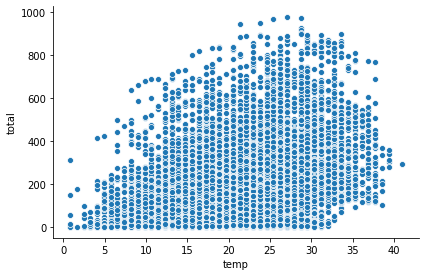

In [7]:
sns.pairplot(bikes,y_vars="total",x_vars="temp",kind = "scatter",aspect= 1.5, height= 4)

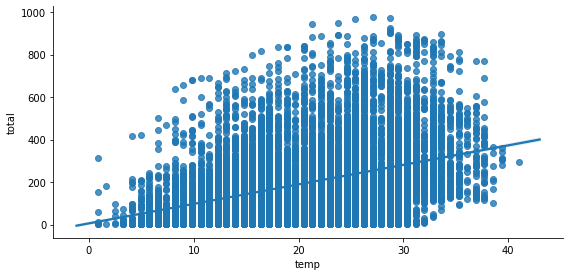

In [8]:
# plot with regression line
sns.pairplot(bikes,y_vars="total",x_vars="temp",kind = "reg",aspect= 2, height= 4)

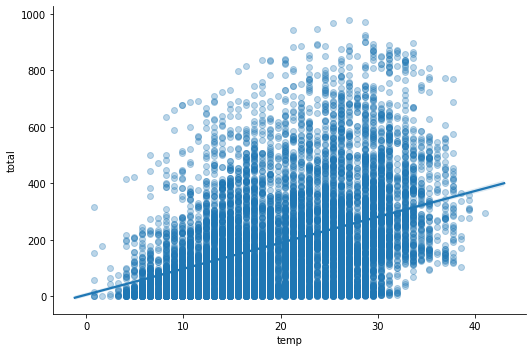

In [9]:
# otherway to plot above graph
sns.lmplot(data = bikes,x = "temp",y = "total",aspect= 1.5,scatter_kws={"alpha" : 0.3},logistic=False)

#### Build Linear Regression Model -- Using one indepenent variable "temp"

In [10]:
## Create X and y
y = bikes[["total"]]
print(y.head())
print(y.shape)

   total
0     16
1     40
2     32
3     13
4      1
(10886, 1)


In [11]:
feature_cols = ["temp"]
X = bikes[feature_cols]
print(X.head())
print(X.shape)

   temp
0  9.84
1  9.02
2  9.02
3  9.84
4  9.84
(10886, 1)


In [12]:
# import model,instantiate,fit
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [13]:
print(linreg)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)


In [14]:
# Print the intercept and coefficients
print(linreg.intercept_)
print(linreg.coef_)

[6.04621296]
[[9.17054048]]


In [15]:
#Using the model for predictions
# y = mx + c  ====  Prediction(y) = 9.17054048X + 6.04621295961681
# Calculate the prediction manually
linreg.intercept_ + linreg.coef_*X   ### (Lets temp(X) = 9.02)
linreg.intercept_ + linreg.coef_*9.02

array([[88.7644881]])

In [16]:
# Use Prediction method to find prediction
linreg.predict(X)

array([[ 96.2843313 ],
       [ 88.7644881 ],
       [ 88.7644881 ],
       ...,
       [133.88354727],
       [133.88354727],
       [126.36370408]])

In [17]:
# Lets compare with manually prediction when X = 9.02
feature= ["temp"]
print(bikes.columns.get_loc('temp'))  ### get column number for temp
X_value = bikes.iloc[2:3,4:5]  ### get single valye from temp column temp
print(X_value.shape)
print("Predicted Value at temp 9.02:", linreg.predict(X_value))  ## same as we got manually

5
(1, 1)
Predicted Value at temp 9.02: [[15.21675344]]


######  Does the scale of temp matter

Lets say that temp was measured in Fahrenheit, rather than celsius. Now will check how that affect on our model.

In [18]:
bikes["temp_F"] = bikes.temp * 1.8 + 32  ### adding column in dataframe bikes
bikes.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total,temp_F
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,49.712
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,48.236
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,48.236
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,49.712
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,49.712


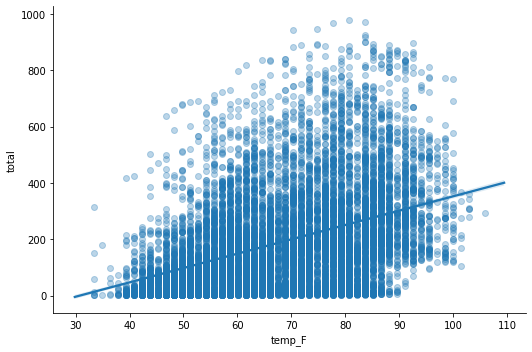

In [19]:
# lets visualize this  ==== there is no any difference in graph between temp and temp_F
sns.lmplot(data=bikes,x="temp_F",y="total",aspect=1.5,scatter_kws={"alpha": 0.3})

Now apply the Linear regression model using temp_F

In [20]:
# create X and y
feature_cols = ["temp_F"]
X = bikes[feature_cols]
X.head()

,temp_F
0,49.712
1,48.236
2,48.236
3,49.712
4,49.712


In [21]:
y = bikes[["total"]]
print(y.head())
print(y.head().shape)

   total
0     16
1     40
2     32
3     13
4      1
(5, 1)


In [22]:
from sklearn.linear_model import LinearRegression

In [23]:
linreg = LinearRegression()

In [24]:
linreg.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [25]:
print(linreg.intercept_)
print(linreg.coef_)

[-156.98561782]
[[5.09474471]]


In [26]:
# predict Total at temp_F = 9.02*1.2 +32 = 48.236
# manually predicting
linreg.coef_ * 48.236 + linreg.intercept_

array([[88.7644881]])

**Conclusion:** The scale of the features is **irrelevant** for linear regression models. When changing the scale, we simply change our **interpretation** of the coefficients.

In [27]:
## drop the temp_F column
bikes.drop(columns="temp_F",inplace=True)
bikes.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


https://www.kaggle.com/nurlan/regression-methods-for-bike-sharing-data

### Linear regression with more than one features

In [28]:
feature_cols = ["temp","season","weather","humidity"]

In [29]:
import seaborn as sns

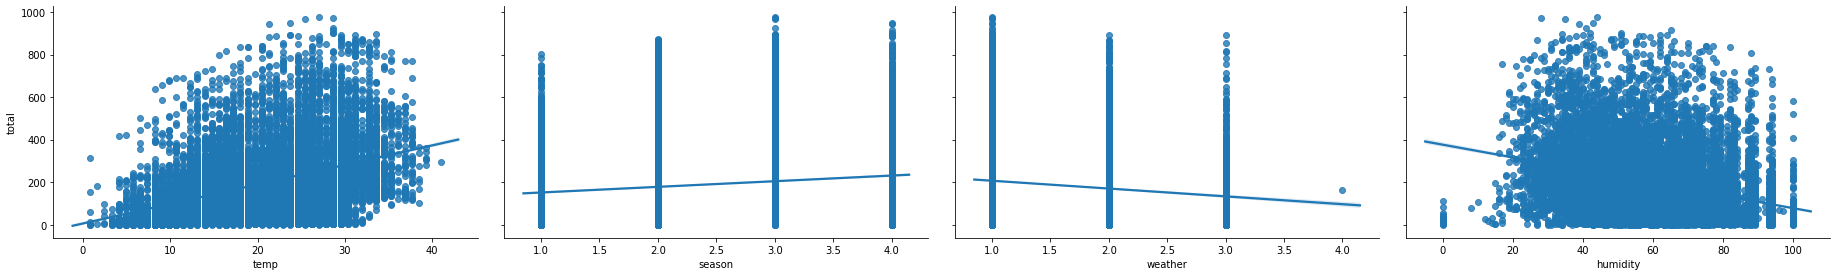

In [30]:
sns.pairplot(data = bikes,x_vars=feature_cols,y_vars="total",kind="reg",aspect=1.6,height =4)

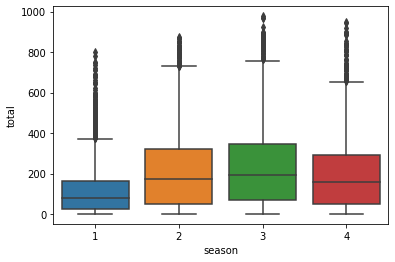

In [31]:
sns.boxplot(data=bikes,x="season",y="total")

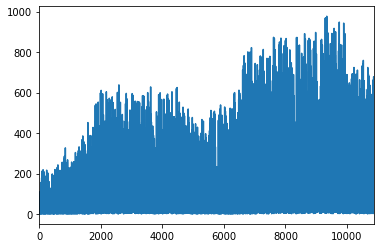

In [32]:
bikes.total.plot()

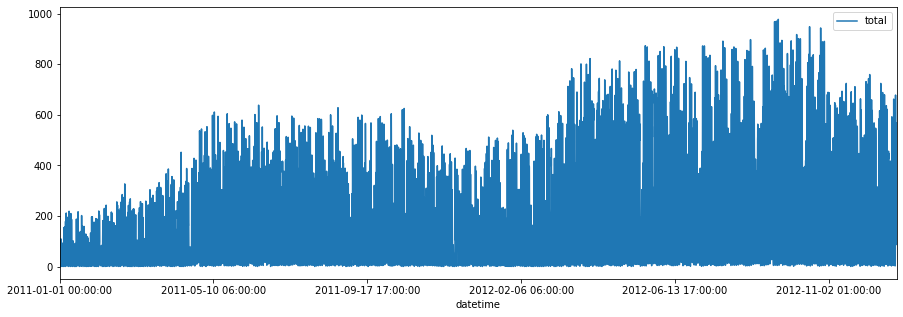

In [33]:
bikes.plot(figsize = (15,5),y = ["total"],x = "datetime")

There are more demand in the winter than the spring, but only because the system is experiencing overall growth and the winter months happen to come after the spring months.

In [34]:
## Apply linear regression model
X = bikes[feature_cols]
y = bikes[["total"]]
print(X.head())
print(y.head())


   temp  season  weather  humidity
0  9.84       1        1        81
1  9.02       1        1        80
2  9.02       1        1        80
3  9.84       1        1        75
4  9.84       1        1        75
   total
0     16
1     40
2     32
3     13
4      1


In [35]:
from sklearn.linear_model import LinearRegression

In [36]:
linreg = LinearRegression()

In [37]:
linreg.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [38]:
print(linreg.intercept_)

[159.52068786]


In [39]:
print(linreg.coef_)
print(feature_cols)

[[ 7.86482499 22.53875753  6.67030204 -3.11887338]]
['temp', 'season', 'weather', 'humidity']


In [40]:
import numpy as np
type(linreg.coef_)
##type(feature_cols)
b = np.array(linreg.coef_)
b
c = np.array(feature_cols)
print(c)
print(b)

['temp' 'season' 'weather' 'humidity']
[[ 7.86482499 22.53875753  6.67030204 -3.11887338]]


In [41]:
d = b.reshape(4,1)
e = c.reshape(4,1)

In [42]:
print(d.shape)
print(e.shape)

(4, 1)
(4, 1)


In [43]:
list(zip(e,d))

[(array(['temp'], dtype='<U8'), array([7.86482499])),
 (array(['season'], dtype='<U8'), array([22.53875753])),
 (array(['weather'], dtype='<U8'), array([6.67030204])),
 (array(['humidity'], dtype='<U8'), array([-3.11887338]))]

In [44]:
f = e.tolist()
g = d.tolist()
list(zip(f,g))


[(['temp'], [7.864824992477442]),
 (['season'], [22.53875753246678]),
 (['weather'], [6.670302035923743]),
 (['humidity'], [-3.1188733823964956])]

Interpreting the coefficients:

- Holding all other features fixed, a 1 unit increase in **temperature** is associated with a **Demand increase of 7.86 bikes**.
- Holding all other features fixed, a 1 unit increase in **season** is associated with a **Demand increase of 22.5 bikes**.
- Holding all other features fixed, a 1 unit increase in **weather** is associated with a **Demand increase of 6.67 bikes**.
- Holding all other features fixed, a 1 unit increase in **humidity** is associated with a **Demand decrease of 3.12 bikes**.

In [45]:
print(X.head(1))

   temp  season  weather  humidity
0  9.84       1        1        81


In [46]:
## predict manually
159.52068786 + 7.86482499*9.84 + 22.53875753*1 + 6.67030204*1 + (-3.11887338)*81

13.49088155160004

In [47]:
# Predic using X (This is training data)
linreg.predict(X)

array([[ 13.49088138],
       [ 10.16059827],
       [ 10.16059827],
       ...,
       [175.7304041 ],
       [175.7304041 ],
       [153.68688069]])

In [48]:
# Lets predict using New Test data
bikes_test = pd.read_csv("C:/E/Github/Data_Files/Bike_Share/bikeshare_test.csv",parse_dates= True)
print(bikes_test.head())
feature_cols_test = ["temp","season","weather","humidity"]
X_test_new = bikes_test[feature_cols_test]
print(X_test_new.head())
print(X_test_new.shape)


              datetime  season  holiday  workingday  weather   temp   atemp  \
0  2011-01-20 00:00:00       1        0           1        1  10.66  11.365   
1  2011-01-20 01:00:00       1        0           1        1  10.66  13.635   
2  2011-01-20 02:00:00       1        0           1        1  10.66  13.635   
3  2011-01-20 03:00:00       1        0           1        1  10.66  12.880   
4  2011-01-20 04:00:00       1        0           1        1  10.66  12.880   

   humidity  windspeed  
0        56    26.0027  
1        56     0.0000  
2        56     0.0000  
3        56    11.0014  
4        56    11.0014  
    temp  season  weather  humidity
0  10.66       1        1        56
1  10.66       1        1        56
2  10.66       1        1        56
3  10.66       1        1        56
4  10.66       1        1        56
(6493, 4)


In [49]:
print(linreg.predict(X_test_new))
linreg.predict(X_test_new).shape

[[97.91187244]
 [97.91187244]
 [97.91187244]
 ...
 [85.43637891]
 [97.91187244]
 [69.84201199]]


(6493, 1)

you can see that from the above 2 rows prediction is coming correct from model and manually

## Feature selection

How do we choose which features to include in the model? We're going to use **train/test split** (and eventually **cross-validation**).

Why not use of **p-values** or **R-squared** for feature selection?

- Linear models rely upon **a lot of assumptions** (such as the features being independent), and if those assumptions are violated, p-values and R-squared are less reliable. Train/test split relies on fewer assumptions.
- Features that are unrelated to the response can still have **significant p-values**.
- Adding features to your model that are unrelated to the response will always **increase the R-squared value**, and adjusted R-squared does not sufficiently account for this.
- p-values and R-squared are **proxies** for our goal of generalization, whereas train/test split and cross-validation attempt to **directly estimate** how well the model will generalize to out-of-sample data.

More generally:

- There are different methodologies that can be used for solving any given data science problem, and here we will follows a **machine learning methodology**.

## Evaluation metrics for regression problems

Evaluation metrics for classification problems, such as **accuracy**, are not useful for regression problems. We need evaluation metrics designed for comparing **continuous values**.

Here are three common evaluation metrics for regression problems:

**Mean Absolute Error** (MAE) is the mean of the absolute value of the errors:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

**Mean Squared Error** (MSE) is the mean of the squared errors:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

**Root Mean Squared Error** (RMSE) is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

In [50]:
# Lets explain by some examples
true_value = [9,8,5,3]
pred_value = [8,9,6,5]

In [51]:
from sklearn import metrics
import numpy as np
print("MAE :", metrics.mean_absolute_error(true_value,pred_value))
print("MSE :", metrics.mean_squared_error(true_value,pred_value))
print("RMSE :", np.sqrt(metrics.mean_squared_error(true_value,pred_value)))

MAE : 1.25
MSE : 1.75
RMSE : 1.3228756555322954


Comparing these metrics :
- **MAE** :  This is the easiest to understand becuase It is the the absolute average error.
- **MSE** :  This is more popular than ***MAE*** becuase it punishes the large errors, which are usefull in realworld.
- **RMSE** : It si even more popular than ***MSE***, It is interretable in "Y" units.

## Comparing models with train/test split and RMSE

In [52]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import numpy as np

In [53]:
print(feature_cols)
print(X.head())
print(X.shape)
print(y.head())
print(y.shape)


['temp', 'season', 'weather', 'humidity']
   temp  season  weather  humidity
0  9.84       1        1        81
1  9.02       1        1        80
2  9.02       1        1        80
3  9.84       1        1        75
4  9.84       1        1        75
(10886, 4)
   total
0     16
1     40
2     32
3     13
4      1
(10886, 1)


In [54]:
# create a function to measure the RMSE

def train_test_rmse(feature_cols):
    X = bikes[feature_cols]
    y = bikes[["total"]]
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 123)
    linreg = LinearRegression()
    linreg.fit(X_train,y_train)
    y_predict= linreg.predict(X_test)
    return np.sqrt(metrics.mean_squared_error(y_predict,y_test))

    

In [55]:
## "temp","season","weather","humidity"
print(train_test_rmse(["temp"]))
print(train_test_rmse(["temp","weather"]))
print(train_test_rmse(["temp","weather","humidity"]))
print(train_test_rmse(["temp","season",]))
print(train_test_rmse(["temp","season","weather"]))
print(train_test_rmse(["temp","season","weather","humidity"]))

167.1151215899102
165.59175074717365
158.26504155780452
166.72731136125202
165.1737396072974
156.50681446308081


### Comparing testing RMSE with null RMSE

In [56]:
# Null RMSE is the the RMSE that can be achived by predicting the response(target) value at mean

In [57]:
print(X.head())
print(y.head())

   temp  season  weather  humidity
0  9.84       1        1        81
1  9.02       1        1        80
2  9.02       1        1        80
3  9.84       1        1        75
4  9.84       1        1        75
   total
0     16
1     40
2     32
3     13
4      1


In [58]:
# create the predicted value using mean of target value
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state = 123)

In [59]:
print(X_train.head())
print(X_test.head())
print(y_train.head())
print(y_test.head())

       temp  season  weather  humidity
4969  10.66       4        1        56
9242  31.16       3        1        62
1654  20.50       2        1        51
7834  22.96       2        1        73
7966  25.42       2        3        88
       temp  season  weather  humidity
6495  18.04       1        1        62
7050  13.12       2        1        61
558   12.30       1        1        52
5085  18.86       4        2        88
3328  33.62       3        1        43
      total
4969      7
9242    578
1654    169
7834    538
7966    303
      total
6495    188
7050      5
558      89
5085     62
3328    150


In [60]:
# Create null dataframe with the same shape as y_test
y_null = y_test*0

In [61]:
print(y_null.shape)
print(type(y_null))
print(y_test.shape)
print(type(y_test))
print(y_test.head())
print(y_null.head())

(2722, 1)
<class 'pandas.core.frame.DataFrame'>
(2722, 1)
<class 'pandas.core.frame.DataFrame'>
      total
6495    188
7050      5
558      89
5085     62
3328    150
      total
6495      0
7050      0
558       0
5085      0
3328      0


In [62]:
## Here we have target value is y_test, now we have find the mean value of y_test
y_test_mean = y_test.mean()
y_test_mean

total    192.264511
dtype: float64

In [63]:
print(y_test_mean.head())
print(y_test_mean.shape)
print(type(y_test_mean))
print(y_test.head())
print(y_test.shape)
print(type(y_test))

total    192.264511
dtype: float64
(1,)
<class 'pandas.core.series.Series'>
      total
6495    188
7050      5
558      89
5085     62
3328    150
(2722, 1)
<class 'pandas.core.frame.DataFrame'>


In [64]:
y_null_mean = y_null.replace(0,y_test_mean)

In [65]:
y_null_mean

,total
6495,192.264511
7050,192.264511
558,192.264511
5085,192.264511
3328,192.264511
...,...
9759,192.264511
3520,192.264511
10576,192.264511
4530,192.264511


In [66]:
# find the null RMSE
from sklearn import metrics
np.sqrt(metrics.mean_squared_error(y_test,y_null_mean))

179.57906896465727

In [67]:
#################### other way convert above null rmse #########################
# split X and y into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)

# create a NumPy array with the same shape as y_test
y_null = np.zeros_like(y_test, dtype=float)

# fill the array with the mean value of y_test
y_test_mean = float(y_test.mean())
print(y_test_mean)
y_null.fill(y_test_mean)
print(y_null)
print(y_null.shape)
print(type(y_null))

########################
# compute null RMSE
print(np.sqrt(metrics.mean_squared_error(y_test, y_null)))

192.26451138868478
[[192.26451139]
 [192.26451139]
 [192.26451139]
 ...
 [192.26451139]
 [192.26451139]
 [192.26451139]]
(2722, 1)
<class 'numpy.ndarray'>
179.57906896465727


you can see from the above both way we are getting the same values

## Handling categorical features

scikit-learn expects all features to be numeric. So how do we include a categorical feature in our model?

- **Ordered categories:** transform them to sensible numeric values (example: small=1, medium=2, large=3)
- **Unordered categories:** use dummy encoding (0/1)

What are the categorical features in our dataset?

- **Ordered categories:** weather (already encoded with sensible numeric values)
- **Unordered categories:** season (needs dummy encoding), holiday (already dummy encoded), workingday (already dummy encoded)

For season, we can't simply leave the encoding as 1 = spring, 2 = summer, 3 = fall, and 4 = winter, because that would imply an **ordered relationship**. Instead, we create **multiple dummy variables:**

In [68]:
bikes.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [69]:
print(bikes["weather"].unique())
print(bikes["season"].unique())


[1 2 3 4]
[1 2 3 4]


In [70]:
# Create dummy variable
season_dummy = pd.get_dummies(bikes["season"],prefix="season")
season_dummy.sample(n = 4,random_state = 5)

,season_1,season_2,season_3,season_4
3650,0,0,1,0
8909,0,0,1,0
4623,0,0,0,1
8818,0,0,1,0


In [71]:
bikes.drop("season",axis= 1,inplace=True)
bikes.head()

,datetime,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total
0,2011-01-01 00:00:00,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,0,0,1,9.84,14.395,75,0.0,0,1,1


In [72]:
season_dummy.drop("season_1",inplace=True,axis = 1)

In [73]:
season_dummy.head()

,season_2,season_3,season_4
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0


In [74]:
# now add dummy season columns in main dataframe bikes
# there are many way to add columns in DF
# using concat
bikes_1 = pd.concat([bikes,season_dummy],axis=1)

In [75]:
bikes_1.sample(n=5,random_state=4)

,datetime,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total,season_2,season_3,season_4
3039,2011-07-15 13:00:00,0,1,1,28.70,32.575,54,12.9980,85,162,247,0,1,0
7091,2012-04-13 20:00:00,0,1,1,20.50,24.240,29,8.9981,44,242,286,1,0,0
10193,2012-11-10 03:00:00,0,0,1,12.30,16.665,81,0.0000,9,11,20,0,0,1
8986,2012-08-16 19:00:00,0,1,1,31.16,34.090,40,7.0015,119,558,677,0,1,0
5856,2012-01-19 05:00:00,0,1,1,4.92,6.060,55,16.9979,0,19,19,0,0,0


In [76]:
# use join to add column using join
# https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html
bikes_2 = bikes.join(season_dummy)
bikes_2.sample(n=5,random_state = 4)

,datetime,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total,season_2,season_3,season_4
3039,2011-07-15 13:00:00,0,1,1,28.70,32.575,54,12.9980,85,162,247,0,1,0
7091,2012-04-13 20:00:00,0,1,1,20.50,24.240,29,8.9981,44,242,286,1,0,0
10193,2012-11-10 03:00:00,0,0,1,12.30,16.665,81,0.0000,9,11,20,0,0,1
8986,2012-08-16 19:00:00,0,1,1,31.16,34.090,40,7.0015,119,558,677,0,1,0
5856,2012-01-19 05:00:00,0,1,1,4.92,6.060,55,16.9979,0,19,19,0,0,0


In [77]:
feature_cols_1 = ["temp","season_2","season_3","season_4" , "weather", "humidity"]
feature_cols_1

['temp', 'season_2', 'season_3', 'season_4', 'weather', 'humidity']

In [78]:
X_1 = bikes_1[feature_cols_1]
y_1 = bikes_1["total"]
print(X.sample(n=4,random_state = 5))
print(y.sample(n=4,random_state = 5))

       temp  season  weather  humidity
3650  26.24       3        2        73
8909  32.80       3        1        33
4623  15.58       4        1        40
8818  32.80       3        1        55
      total
3650     87
8909    248
4623    334
8818    623


In [79]:
bikes_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 14 columns):
datetime      10886 non-null object
holiday       10886 non-null int64
workingday    10886 non-null int64
weather       10886 non-null int64
temp          10886 non-null float64
atemp         10886 non-null float64
humidity      10886 non-null int64
windspeed     10886 non-null float64
casual        10886 non-null int64
registered    10886 non-null int64
total         10886 non-null int64
season_2      10886 non-null uint8
season_3      10886 non-null uint8
season_4      10886 non-null uint8
dtypes: float64(3), int64(7), object(1), uint8(3)
memory usage: 967.5+ KB


In [80]:
### Apply Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
import numpy as np

In [81]:
X_train_1,X_test_1,y_train_1,y_test_1 = train_test_split(X_1,y_1,test_size = 0.3, random_state=123)

In [82]:
print(X_train_1.shape)
print(y_train_1.shape)
print(X_test_1.shape)
print(y_test_1.shape)

(7620, 6)
(7620,)
(3266, 6)
(3266,)


In [83]:
print(type(X_train_1))
print(type(y_train_1))
print(type(X_test_1))
print(type(y_test_1))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


In [84]:
linreg_1 = LinearRegression()

In [85]:
linreg_1.fit(X_train_1,y_train_1)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [86]:
predict_1 = linreg_1.predict(X_test_1)
print(predict_1)
print(predict_1.shape)
print(type(predict_1))

[161.66776223 103.2731892  124.04714745 ... 311.92566725  72.59715724
  72.24986259]
(3266,)
<class 'numpy.ndarray'>


In [87]:
## create function to measure the RMSE for columns,import all lib before use this function
def train_test_rmse_1(feature_cols_1):
    X_1 = bikes_1[feature_cols_1]
    y_1 = bikes_1[["total"]]
    X_train_1,X_test_1,y_train_1,y_test_1 = train_test_split(X_1,y_1,test_size = 0.3, random_state=123)
    linreg_1 = LinearRegression()
    linreg_1.fit(X_train_1,y_train_1)
    predict_1 = linreg_1.predict(X_test_1)
    return(np.sqrt(metrics.mean_squared_error(y_test_1,predict_1)))  

In [88]:
## "temp","season_2","season_3","season_4","weather", "humidity"
print(train_test_rmse_1(["temp"]))
print(train_test_rmse_1(["temp","weather"]))
print(train_test_rmse_1(["temp","weather","humidity"]))
print(train_test_rmse_1(["temp","season_2","season_3","season_4"]))
print(train_test_rmse_1(["temp","season_2","season_3","season_4","weather"]))
print(train_test_rmse_1(["temp","season_2","season_3","season_4","weather","humidity"]))

167.1151215899102
165.59175074717365
158.26504155780452
163.86984797792732
162.34363933012594
155.2364571963799


Below are RMSE for output when there were no any dummy coding for season
    
    print(train_test_rmse(["temp"]))
    print(train_test_rmse(["temp","weather"]))
    print(train_test_rmse(["temp","weather","humidity"]))
    print(train_test_rmse(["temp","season",]))
    print(train_test_rmse(["temp","season","weather"]))
    print(train_test_rmse(["temp","season","weather","humidity"]))

    167.1151215899102
    166.72731136125202
    165.1737396072974
    156.50681446308081

In [89]:
# using these as features is not allowed!  total = casual + registered
print (train_test_rmse_1(['casual', 'registered']))

7.732940707513183e-14


In [90]:
## drop both columns
bikes_1.drop(["casual"],axis=1,inplace=True)

In [91]:
bikes_1.drop(["registered"],axis=1,inplace=True)

## Feature engineering

See if you can create the following features:

- **hour:** as a single numeric feature (0 through 23)
- **hour:** as a categorical feature (use 23 dummy variables)
- **daytime:** as a single categorical feature (daytime=1 from 7am to 8pm, and daytime=0 otherwise)

Lets see which one performs the best!

In [92]:
bikes_1.head()

,datetime,holiday,workingday,weather,temp,atemp,humidity,windspeed,total,season_2,season_3,season_4
0,2011-01-01 00:00:00,0,0,1,9.84,14.395,81,0.0,16,0,0,0
1,2011-01-01 01:00:00,0,0,1,9.02,13.635,80,0.0,40,0,0,0
2,2011-01-01 02:00:00,0,0,1,9.02,13.635,80,0.0,32,0,0,0
3,2011-01-01 03:00:00,0,0,1,9.84,14.395,75,0.0,13,0,0,0
4,2011-01-01 04:00:00,0,0,1,9.84,14.395,75,0.0,1,0,0,0


In [93]:
bikes_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
datetime      10886 non-null object
holiday       10886 non-null int64
workingday    10886 non-null int64
weather       10886 non-null int64
temp          10886 non-null float64
atemp         10886 non-null float64
humidity      10886 non-null int64
windspeed     10886 non-null float64
total         10886 non-null int64
season_2      10886 non-null uint8
season_3      10886 non-null uint8
season_4      10886 non-null uint8
dtypes: float64(3), int64(5), object(1), uint8(3)
memory usage: 797.4+ KB


As we can see, datetime's type is object. We should convert it to datetime.

In [94]:
bikes_1.datetime = pd.to_datetime(bikes_1.datetime)
bikes_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
datetime      10886 non-null datetime64[ns]
holiday       10886 non-null int64
workingday    10886 non-null int64
weather       10886 non-null int64
temp          10886 non-null float64
atemp         10886 non-null float64
humidity      10886 non-null int64
windspeed     10886 non-null float64
total         10886 non-null int64
season_2      10886 non-null uint8
season_3      10886 non-null uint8
season_4      10886 non-null uint8
dtypes: datetime64[ns](1), float64(3), int64(5), uint8(3)
memory usage: 797.4 KB


In [95]:
bikes_1["hour"] = bikes_1.datetime.dt.hour

In [96]:
bikes_1.head(6)

,datetime,holiday,workingday,weather,temp,atemp,humidity,windspeed,total,season_2,season_3,season_4,hour
0,2011-01-01 00:00:00,0,0,1,9.84,14.395,81,0.0000,16,0,0,0,0
1,2011-01-01 01:00:00,0,0,1,9.02,13.635,80,0.0000,40,0,0,0,1
2,2011-01-01 02:00:00,0,0,1,9.02,13.635,80,0.0000,32,0,0,0,2
3,2011-01-01 03:00:00,0,0,1,9.84,14.395,75,0.0000,13,0,0,0,3
4,2011-01-01 04:00:00,0,0,1,9.84,14.395,75,0.0000,1,0,0,0,4
5,2011-01-01 05:00:00,0,0,2,9.84,12.880,75,6.0032,1,0,0,0,5


In [97]:
bikes_1["daytime"] = ((bikes_1.hour >6) & (bikes_1.hour <21)).astype(int)

In [98]:
bikes_1.sample(n = 5, random_state = 5)

,datetime,holiday,workingday,weather,temp,atemp,humidity,windspeed,total,season_2,season_3,season_4,hour,daytime
3650,2011-09-03 00:00:00,0,0,2,26.24,30.305,73,7.0015,87,0,1,0,0,0
8909,2012-08-13 14:00:00,0,1,1,32.80,34.850,33,7.0015,248,0,1,0,14,1
4623,2011-11-05 17:00:00,0,0,1,15.58,19.695,40,11.0014,334,0,0,1,17,1
8818,2012-08-09 19:00:00,0,1,1,32.80,37.880,55,12.9980,623,0,1,0,19,1
1640,2011-04-14 06:00:00,0,1,1,13.94,17.425,76,7.0015,70,1,0,0,6,0


In [99]:
# lets consider hours is a categorical variable
# convert hour to dummy variables
hour_dummy = pd.get_dummies(bikes_1.hour,prefix="hour")
hour_dummy.sample(n = 5, random_state = 5)

,hour_0,hour_1,hour_2,hour_3,hour_4,hour_5,hour_6,hour_7,hour_8,hour_9,...,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23
3650,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8909,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4623,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
8818,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1640,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [100]:
hour_dummy.drop(["hour_0"],axis=1,inplace=True)
hour_dummy.sample(n = 5, random_state = 5)

,hour_1,hour_2,hour_3,hour_4,hour_5,hour_6,hour_7,hour_8,hour_9,hour_10,...,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23
3650,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8909,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4623,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
8818,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1640,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [101]:
# Add hour dummy column in bike_1
bikes_1 = pd.concat([bikes_1,hour_dummy],axis=1)

In [102]:
bikes_1.sample(n = 5, random_state = 4)

,datetime,holiday,workingday,weather,temp,atemp,humidity,windspeed,total,season_2,...,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23
3039,2011-07-15 13:00:00,0,1,1,28.70,32.575,54,12.9980,247,0,...,0,0,0,0,0,0,0,0,0,0
7091,2012-04-13 20:00:00,0,1,1,20.50,24.240,29,8.9981,286,1,...,0,0,0,0,0,0,1,0,0,0
10193,2012-11-10 03:00:00,0,0,1,12.30,16.665,81,0.0000,20,0,...,0,0,0,0,0,0,0,0,0,0
8986,2012-08-16 19:00:00,0,1,1,31.16,34.090,40,7.0015,677,0,...,0,0,0,0,0,1,0,0,0,0
5856,2012-01-19 05:00:00,0,1,1,4.92,6.060,55,16.9979,19,0,...,0,0,0,0,0,0,0,0,0,0


In [103]:
### create function to measure the RMSE for columns,import all lib before use this function
feature_cols_2 = []
def train_test_rmse_2(feature_cols_2):
    X_1 = bikes_1[feature_cols_2]
    y_1 = bikes_1[["total"]]
    X_train_1,X_test_1,y_train_1,y_test_1 = train_test_split(X_1,y_1,test_size = 0.3, random_state=123)
    linreg_1 = LinearRegression()
    linreg_1.fit(X_train_1,y_train_1)
    predict_1 = linreg_1.predict(X_test_1)
    return(np.sqrt(metrics.mean_squared_error(y_test_1,predict_1)))  

In [104]:
## "temp","season_2","season_3","season_4","weather", "humidity"
print(train_test_rmse_2(["temp"]))
print(train_test_rmse_2(["temp","weather"]))
print(train_test_rmse_2(["temp","weather","humidity"]))
print(train_test_rmse_2(["temp","season_2","season_3","season_4"]))
print(train_test_rmse_2(["temp","season_2","season_3","season_4","weather"]))
print(train_test_rmse_2(["temp","season_2","season_3","season_4","weather","humidity"]))
print(train_test_rmse_2(["temp","season_2","season_3","season_4","weather","humidity","hour"]))
print(train_test_rmse_2(["temp","season_2","season_3","season_4","weather","humidity","hour","daytime"]))

167.1151215899102
165.59175074717365
158.26504155780452
163.86984797792732
162.34363933012594
155.2364571963799
146.73959607039268
126.95078801390939


In [105]:
print(train_test_rmse_2(bikes_1.columns[bikes_1.columns.str.startswith('hour_')]))

128.4751165730303


In [106]:
dummy_col = [col for col in bikes_1 if col.startswith('hour_')]
print(dummy_col)

['hour_1', 'hour_2', 'hour_3', 'hour_4', 'hour_5', 'hour_6', 'hour_7', 'hour_8', 'hour_9', 'hour_10', 'hour_11', 'hour_12', 'hour_13', 'hour_14', 'hour_15', 'hour_16', 'hour_17', 'hour_18', 'hour_19', 'hour_20', 'hour_21', 'hour_22', 'hour_23']


In [107]:
print(train_test_rmse_2(["temp","season_2","season_3","season_4","weather","humidity","daytime",'hour_1', 'hour_2', 'hour_3', 'hour_4', 'hour_5', 'hour_6', 'hour_7', 'hour_8', 'hour_9', 'hour_10', 'hour_11', 'hour_12', 'hour_13', 'hour_14', 'hour_15', 'hour_16', 'hour_17', 'hour_18', 'hour_19', 'hour_20', 'hour_21', 'hour_22', 'hour_23']))

112.58088225822908


## Advantages and Disdvantages

Advantages of linear regression:

- Simple to explain
- Highly interpretable
- Model training and prediction are fast
- No tuning is required (excluding regularization)
- Features don't need scaling
- Can perform well with a small number of observations
- Well-understood

Disadvantages of linear regression:

- Presumes a linear relationship between the features and the response
- Performance is (generally) not competitive with the best supervised learning methods due to high bias
- Can't automatically learn feature interactions